In [139]:
import networkx as nx
import plotly
import plotly.graph_objects as go
import json

In [140]:
with open("data/events.json") as f:
    data = json.load(f)

In [154]:
nodes = [(data[i]["id"]) for i in range(len(data[i]))]
edges_positive = [(data[i]["id"], data[i]["answers"][0]["responses"][0]["next_event_id"])]

In [142]:
G = nx.Graph()

In [145]:
pos = {}
edges = []
i=0

for d in data:
    if "tag" not in d.keys() or d["tag"] is None:
        px = 0
        tag = "real"
    else:
        px = 1
        tag = "fake"
    
    #pos[d["id"]]=(px, d["date"])
    date = int(d["date"])
    if date<-10000:
        i=i+1
        date = -10000+i
        
    G.add_node(d["id"], pos=(int(date),px), event=d["event_title"], tag=tag)

    previous_ids = d["previous_ids"]
    for p in previous_ids:
        G.add_edge(p,d["id"])
    next_ids = d["next_ids"]
    for p in next_ids:
        G.add_edge(d["id"],p)

KeyError: 'next_ids'

In [146]:
for i in range(len(G.nodes())):
    print(G.nodes[i])

KeyError: 0

In [147]:
for edge in G.edges():
    if "pos" in G.nodes[edge[0]].keys():
        x0, y0 = G.nodes[edge[0]]['pos']
        print(x0,y0)

In [148]:
G.nodes

NodeView((-8,))

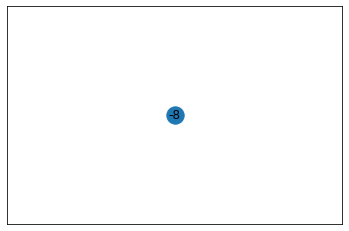

In [149]:
nx.draw_networkx(G)

In [150]:
def get_color(tag):
    if tag is None:
        return "green"
    elif tag=="fake":
        return "red"
    return "green"

In [151]:
edge_x = []
edge_y = []
for edge in G.edges():
    if "pos" in G.nodes[edge[0]].keys() and "pos" in G.nodes[edge[1]].keys():
        x0, y0 = G.nodes[edge[0]]['pos']
        x1, y1 = G.nodes[edge[1]]['pos']
        edge_x.append(x0)
        edge_x.append(x1)
        edge_y.append(y0)
        edge_y.append(y1)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
events = []
colors = []
for node in G.nodes():
    if "pos" in G.nodes[node].keys():
        n = G.nodes[node]
        x, y = n['pos']
        events.append(n["event"])
        colors.append(get_color(n["tag"]))
        node_x.append(x)
        node_y.append(y)

        
print(node_x)
print(events)
print(node_y)
node_trace = go.Scatter(
    x=node_x, y=node_y, text=events,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        color=colors,
        size=10,
        line_width=2)
)
fig = go.Figure(data=[node_trace])
fig.show()

[4000000000]
['Fin utopique']
[1]
